In [3]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

#### Automatic Differentiation
* tensorflow는 딥러닝 모델을 구성하는 복잡한 인공 신경망의 각 노드에서 계산되는 미분을 자동으로 계산해준다. 각 변수의 기울기에 해당하는 gradient를 계산하는데 특화되어 있다. 

In [2]:
g = tf.random.Generator.from_seed(2020)
x = g.normal(shape=(10, ))
y = 3 * x - 2 
print(f"x : {x.numpy}")
print(f"y : {y.numpy}")



x : <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.20943771,  1.2746525 ,  1.213214  , -0.17576952,  1.876984  ,
        0.16379918,  1.082245  ,  0.6199966 , -0.44402212,  1.3048344 ],
      dtype=float32)>>
y : <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-2.628313  ,  1.8239574 ,  1.6396422 , -2.5273085 ,  3.630952  ,
       -1.5086024 ,  1.2467351 , -0.14001012, -3.3320663 ,  1.9145031 ],
      dtype=float32)>>


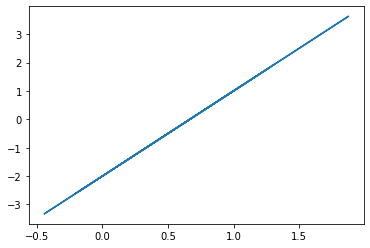

In [6]:
plt.plot(x, y)
plt.show()

In [9]:
def cal_mse(x, y, a, b):
    y_pred = a * x + b 
    squared_error = (y_pred - y) ** 2 
    mean_squared_error = tf.reduce_mean(squared_error)
    return mean_squared_error  

In [11]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 200

for epoch in range(1, EPOCHS + 1):

    with tf.GradientTape() as tape:
        mse = cal_mse(x, y, a, b)
        
    grad = tape.gradient(mse, {'a': a, 'b': b})
    d_a, d_b = grad['a'], grad['b']    

    a.assign_sub(d_a * 0.05)
    b.assign_sub(d_b * 0.05)    

    if epoch % 20 == 0:    
        print("EPOCH %d - MSE: %.4f --- a: %.2f --- b: %.2f" % (epoch, mse, a, b))

EPOCH 20 - MSE: 1.1415 --- a: 1.74 --- b: -0.75
EPOCH 40 - MSE: 0.2881 --- a: 2.37 --- b: -1.37
EPOCH 60 - MSE: 0.0728 --- a: 2.69 --- b: -1.68
EPOCH 80 - MSE: 0.0184 --- a: 2.84 --- b: -1.84
EPOCH 100 - MSE: 0.0046 --- a: 2.92 --- b: -1.92
EPOCH 120 - MSE: 0.0012 --- a: 2.96 --- b: -1.96
EPOCH 140 - MSE: 0.0003 --- a: 2.98 --- b: -1.98
EPOCH 160 - MSE: 0.0001 --- a: 2.99 --- b: -1.99
EPOCH 180 - MSE: 0.0000 --- a: 2.99 --- b: -1.99
EPOCH 200 - MSE: 0.0000 --- a: 3.00 --- b: -2.00
